In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, gaussian_kde

In [47]:
# Generate samples from a 2-dimensional Gaussian distribution
num_samples = 1000
mu = np.array([2.0, -3.0])
Sigma = np.array([[1.0, 0.7],
                  [0.7, 1.0]])
X = np.random.multivariate_normal(mu, Sigma, num_samples)

In [48]:
def multivariate_normal_pdf(X, mu, Sigma):
    D = X.shape[1]
    norm_const = np.power(2.0*np.pi, -0.5*D)
    det_term = np.power(np.linalg.det(Sigma), -0.5)
    cov_inv = np.linalg.inv(Sigma)
    exp_term = np.exp(-0.5*np.matmul(X-mu, np.matmul(cov_inv, np.transpose(X-mu))))
    pdf = norm_const*det_term*exp_term
    return np.diag(pdf)

In [49]:
density = multivariate_normal_pdf(X, mu, Sigma)
density_scipy = multivariate_normal.pdf(X, mu, Sigma)
error = density - density_scipy
print('Maximum error: %e' % (error.max()))

Maximum error: 5.551115e-17


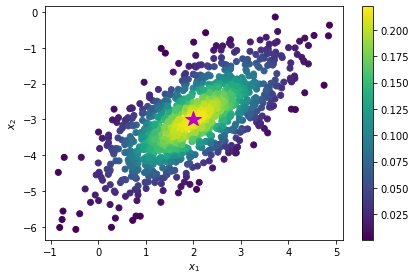

In [50]:
# Plot samples colored by their density
plt.figure()
plt.scatter(X[:,0], X[:,1], c = density)
plt.colorbar()
plt.plot(mu[0], mu[1], 'm*', ms = 16)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.tight_layout()

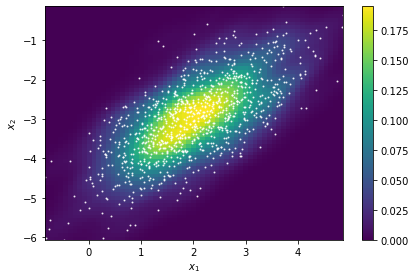

In [52]:
# Kernel density estimation
nn = 64
xx = np.linspace(X[:,0].min(), X[:,0].max(), 64)
yy = np.linspace(X[:,1].min(), X[:,1].max(), 64)
grid = np.meshgrid(xx, yy)
positions = np.array(grid).T.reshape(-1,2)

kernel = gaussian_kde(X.T)
Z = kernel(positions.T).reshape(nn,nn)

plt.figure()
plt.pcolor(grid[0], grid[1], Z.T)
plt.plot(X[:,0], X[:,1], 'w.', ms=2, alpha=0.8)
plt.colorbar()
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.tight_layout()